# EARM 1.0 (extrinsic apoptosis reaction model)
Albeck JG, Burke JM, Spencer SL, Lauffenburger DA, Sorger PK, 2008
Modeling a Snap-Action, Variable-Delay Switch Controlling Extrinsic
Cell Death. PLoS Biol 6(12): e299. doi:10.1371/journal.pbio.0060299

http://www.plosbiology.org/article/info:doi/10.1371/journal.pbio.0060299

In [1]:
from pysb import *

Model()
Annotation(model, 'is', 'http://identifiers.org/biomodels.db/BIOMD0000000220')
Annotation(model, 'isDescribedBy',
           'http://identifiers.org/doi/10.1371/journal.pbio.0060299')

transloc = .01; # rate of translocation between the cytosolic and mitochondrial compartments

v = .07; # mitochondria compartment volume/cell volume

# Non-zero initial conditions (in molecules per cell):
Parameter('L_0'        , 3000); # baseline level of ligand for most experiments (corresponding to 50 ng/ml SuperKiller TRAIL)
Parameter('pR_0'       , 200);  # TRAIL receptor (for experiments not involving siRNA)
Parameter('flip_0'     , 1e2);  # Flip
Parameter('pC8_0'      , 2e4);  # procaspase-8 (pro-C8)
Parameter('BAR_0'      , 1e3);  # Bifunctional apoptosis regulator
Parameter('pC3_0'      , 1e4);  # procaspase-3 (pro-C3)
Parameter('pC6_0'      , 1e4);  # procaspase-6 (pro-C6)  
Parameter('XIAP_0'     , 1e5);  # X-linked inhibitor of apoptosis protein  
Parameter('PARP_0'     , 1e6);  # C3* substrate
Parameter('Bid_0'      , 4e4);  # Bid
Parameter('Bcl2c_0'    , 2e4);  # cytosolic Bcl-2
Parameter('Bax_0'      , 1e5);  # Bax
Parameter('Bcl2_0'     , 2e4);  # mitochondrial Bcl-2  
Parameter('Mito_0'     , 5e5);  # mitochondrial binding sites for activated Bax
Parameter('mCytoC_0'   , 5e5);  # cytochrome c
Parameter('mSmac_0'    , 1e5);  # Smac    
Parameter('pC9_0'      , 1e5);  # procaspase-9 (pro-C9)
Parameter('Apaf_0'     , 1e5);  # Apaf-1


Monomer('L', ['b'])
Monomer('pR', ['b'])
Monomer('DISC', ['b'])
Monomer('flip', ['b'])
Monomer('pC8', ['b'])
Monomer('C8', ['b'])
Monomer('BAR', ['b'])
Monomer('pC3', ['b'])
Monomer('C3', ['b'])
Monomer('pC6', ['b'])
Monomer('C6', ['b'])
Monomer('XIAP', ['b'])
Monomer('C3_U', ['b'])
Monomer('PARP', ['b'])
Monomer('CPARP', ['b'])
Monomer('Bid', ['b'])
Monomer('tBid', ['b'])
Monomer('Bcl2c', ['b'])
Monomer('Bax', ['b'])
Monomer('aBax', ['b'])
Monomer('MBax', ['b'])
Monomer('Bcl2', ['b'])
Monomer('Bax2', ['b'])
Monomer('Bax4', ['b'])
Monomer('Mito', ['b'])
Monomer('AMito', ['b'])
Monomer('mCytoC', ['b'])
Monomer('ACytoC', ['b'])
Monomer('mSmac', ['b'])
Monomer('ASmac', ['b'])
Monomer('cCytoC', ['b'])
Monomer('Apaf', ['b'])
Monomer('aApaf', ['b'])
Monomer('pC9', ['b'])
Monomer('Apop', ['b'])
Monomer('cSmac', ['b'])


def catalyze(enz, sub, prod, kf, kr, kc):
    """2-step catalytic process"""
    r1_name = 'bind_%s_%s' % (sub.name, enz.name)
    r2_name = 'produce_%s_via_%s' % (prod.name, enz.name)
    E = enz(b=None)
    S = sub(b=None)
    ES = enz(b=1) % sub(b=1)
    P = prod(b=None)
    Rule(r1_name, E + S <> ES, kf, kr)
    Rule(r2_name, ES >> E + P, kc)


def catalyze_convert(s1, s2, p, kf, kr, kc):
    """2-step catalytic-type process, but the "catalyst" is effectively consumed"""
    r1_name = 'bind_%s_%s' % (s1.name, s2.name)
    r2_name = 'produce_%s' % p.name
    A = s1(b=None)
    B = s2(b=None)
    AB = s1(b=1) % s2(b=1)
    C = p(b=None)
    Rule(r1_name, A + B <> AB, kf, kr)
    Rule(r2_name, AB >> C, kc)


def inhibit(targ, inh, kf, kr):
    """inhibition by complexation/sequestration"""
    r_name = 'inhibit_%s_by_%s' % (targ.name, inh.name)
    T = targ(b=None)
    I = inh(b=None)
    TI = targ(b=1) % inh(b=1)
    Rule(r_name, T + I <> TI, kf, kr)


# L + pR <--> L:pR --> DISC
Parameter('kf1', 4e-07)
Parameter('kr1', 1e-03)
Parameter('kc1', 1e-05)
catalyze_convert(L, pR, DISC, kf1, kr1, kc1)

# flip + DISC <-->  flip:DISC  
Parameter('kf2', 1e-06)
Parameter('kr2', 1e-03)
inhibit(DISC, flip, kf2, kr2)

# pC8 + DISC <--> DISC:pC8 --> C8 + DISC
Parameter('kf3', 1e-06)
Parameter('kr3', 1e-03)
Parameter('kc3', 1e+00)
catalyze(DISC, pC8, C8, kf3, kr3, kc3)

# C8 + BAR <--> BAR:C8 
Parameter('kf4', 1e-06)
Parameter('kr4', 1e-03)
inhibit(BAR, C8, kf4, kr4)

# pC3 + C8 <--> pC3:C8 --> C3 + C8
Parameter('kf5', 1e-07)
Parameter('kr5', 1e-03)
Parameter('kc5', 1e+00)
catalyze(C8, pC3, C3, kf5, kr5, kc5)

# pC6 + C3 <--> pC6:C3 --> C6 + C3
Parameter('kf6', 1e-06)
Parameter('kr6', 1e-03)
Parameter('kc6', 1e+00)
catalyze(C3, pC6, C6, kf6, kr6, kc6)

# pC8 + C6 <--> pC8:C6 --> C8 + C6
Parameter('kf7', 3e-08)
Parameter('kr7', 1e-03)
Parameter('kc7', 1e+00)
catalyze(C6, pC8, C8, kf7, kr7, kc7)

# XIAP + C3 <--> XIAP:C3 --> XIAP + C3_U
Parameter('kf8', 2e-06)
Parameter('kr8', 1e-03)
Parameter('kc8', 1e-01)
catalyze(XIAP, C3, C3_U, kf8, kr8, kc8)

# PARP + C3 <--> PARP:C3 --> CPARP + C3
Parameter('kf9', 1e-06)
Parameter('kr9', 1e-02)
Parameter('kc9', 1e+00)
catalyze(C3, PARP, CPARP, kf9, kr9, kc9)

# Bid + C8 <--> Bid:C8 --> tBid + C8
Parameter('kf10', 1e-07)
Parameter('kr10', 1e-03)
Parameter('kc10', 1e+00)
catalyze(C8, Bid, tBid, kf10, kr10, kc10)

# tBid + Bcl2c <-->  tBid:Bcl2c  
Parameter('kf11', 1e-06)
Parameter('kr11', 1e-03)
inhibit(tBid, Bcl2c, kf11, kr11)

# Bax + tBid <--> Bax:tBid --> aBax + tBid 
Parameter('kf12', 1e-07)
Parameter('kr12', 1e-03)
Parameter('kc12', 1e+00)
catalyze(tBid, Bax, aBax, kf12, kr12, kc12)

# aBax <-->  MBax 
Parameter('kf13', transloc)
Parameter('kr13', transloc)
Rule('transloc_MBax_aBax', aBax(b=None) <> MBax(b=None), kf13, kr13)

# MBax + Bcl2 <-->  MBax:Bcl2  
Parameter('kf14', 1e-06/v)
Parameter('kr14', 1e-03)
inhibit(MBax, Bcl2, kf14, kr14)

# MBax + MBax <-->  Bax2
Parameter('kf15', 1e-06/v*2)
Parameter('kr15', 1e-03)
Rule('dimerize_MBax_to_Bax2', MBax(b=None) + MBax(b=None) <> Bax2(b=None), kf15, kr15)

# Bax2 + Bcl2 <-->  Bax2:Bcl2  
Parameter('kf16', 1e-06/v)
Parameter('kr16', 1e-03)
inhibit(Bax2, Bcl2, kf16, kr16)

# Bax2 + Bax2 <-->  Bax4
Parameter('kf17', 1e-06/v*2)
Parameter('kr17', 1e-03)
Rule('dimerize_Bax2_to_Bax4', Bax2(b=None) + Bax2(b=None) <> Bax4(b=None), kf17, kr17)

# Bax4 + Bcl2 <-->  Bax4:Bcl2  
Parameter('kf18', 1e-06/v)
Parameter('kr18', 1e-03)
inhibit(Bax4, Bcl2, kf18, kr18)

# Bax4 + Mito <-->  Bax4:Mito -->  AMito  
Parameter('kf19', 1e-06/v)
Parameter('kr19', 1e-03)
Parameter('kc19', 1e+00)
catalyze_convert(Bax4, Mito, AMito, kf19, kr19, kc19)

# AMito + mCytoC <-->  AMito:mCytoC --> AMito + ACytoC  
Parameter('kf20', 2e-06/v)
Parameter('kr20', 1e-03)
Parameter('kc20', 1e+01)
catalyze(AMito, mCytoC, ACytoC, kf20, kr20, kc20)

# AMito + mSmac <-->  AMito:mSmac --> AMito + ASmac  
Parameter('kf21', 2e-06/v)
Parameter('kr21', 1e-03)
Parameter('kc21', 1e+01)
catalyze(AMito, mSmac, ASmac, kf21, kr21, kc21)

# ACytoC <-->  cCytoC
Parameter('kf22', transloc)
Parameter('kr22', transloc)
Rule('transloc_cCytoC_ACytoC', ACytoC(b=None) <> cCytoC(b=None), kf22, kr22)

# Apaf + cCytoC <-->  Apaf:cCytoC --> aApaf + cCytoC
Parameter('kf23', 5e-07)
Parameter('kr23', 1e-03)
Parameter('kc23', 1e+00)
catalyze(cCytoC, Apaf, aApaf, kf23, kr23, kc23)

# aApaf + pC9 <-->  Apop
Parameter('kf24', 5e-08)
Parameter('kr24', 1e-03)
Rule('bind_aApaf_pC9_as_Apop', aApaf(b=None) + pC9(b=None) <> Apop(b=None), kf24, kr24)

# Apop + pC3 <-->  Apop:pC3 --> Apop + C3
Parameter('kf25', 5e-09)
Parameter('kr25', 1e-03)
Parameter('kc25', 1e+00)
catalyze(Apop, pC3, C3, kf25, kr25, kc25)

# ASmac <-->  cSmac
Parameter('kf26', transloc)
Parameter('kr26', transloc)
Rule('transloc_cSmac_ASmac', ASmac(b=None) <> cSmac(b=None), kf26, kr26)

# Apop + XIAP <-->  Apop:XIAP  
Parameter('kf27', 2e-06)
Parameter('kr27', 1e-03)
inhibit(Apop, XIAP, kf27, kr27)

# cSmac + XIAP <-->  cSmac:XIAP  
Parameter('kf28', 7e-06)
Parameter('kr28', 1e-03)
inhibit(cSmac, XIAP, kf28, kr28)



# Fig 4B
Observable('Bid_unbound',   Bid(b=None))
Observable('PARP_unbound',  PARP(b=None))
Observable('mSmac_unbound', mSmac(b=None))
# this is what I originally thought 4B was actually plotting -JLM
Observable('tBid_total',  tBid())
Observable('CPARP_total', CPARP())
Observable('cSmac_total', cSmac())



# generate initial conditions from _0 parameter naming convention
for m in model.monomers:
    ic_param = model.parameters.get('%s_0' % m.name)
    if ic_param is not None:
        sites = {}
        for s in m.sites:
            if s in m.site_states:
                sites[s] = m.site_states[s][0]
            else:
                sites[s] = None
        Initial(m(sites), ic_param)

## Simulation
### Figure 4A

In [8]:
%matplotlib inline

from pylab import *
from pysb.integrate import odesolve

# saturating level of ligand (corresponding to ~1000 ng/ml SuperKiller TRAIL)
Lsat = 6E4; 

# relationship of ligand concentration in the model (in # molecules/cell) to actual TRAIL concentration (in ng/ml)
Lfactor = model.parameters['L_0'].value / 50;

L_0_baseline = model.parameters['L_0'].value

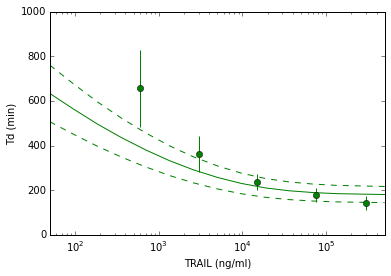

In [9]:
t = linspace(0, 20*3600, 20*60+1)  # 20 hours, in seconds, 1 min sampling
dt = t[1] - t[0]

Ls_exp = Lsat / array([1, 4, 20, 100, 500])
Td_exp = [144.2, 178.7, 236,   362.5, 656.5]
Td_std = [32.5,   32.2,  36.4,  78.6, 171.6]
Ts_exp = [21.6,   23.8,  27.2,  22.0,  19.0]
Ts_std = [9.5,     9.5,  12.9,   7.7,  10.5]

CVenv = 0.2
# num steps was originally 40, but 15 is plenty smooth enough for screen display
Ls = floor(logspace(1,5,15)) 

fs = empty_like(Ls)
Ts = empty_like(Ls)
Td = empty_like(Ls)
for i in range(len(Ls)):
    model.parameters['L_0'].value = Ls[i]

    x = odesolve(model, t)

    fs[i] = (x['PARP_unbound'][0] - x['PARP_unbound'][-1]) / x['PARP_unbound'][0]
    dP = 60 * (x['PARP_unbound'][:-1] - x['PARP_unbound'][1:]) / (dt * x['PARP_unbound'][0])  # in minutes
    ttn = argmax(dP)
    dPmax = dP[ttn]
    Ts[i] = 1 / dPmax  # minutes
    Td[i] = t[ttn] / 60  # minutes

figure("Figure 4A")
plot(Ls/Lfactor, Td, 'g-', Ls/Lfactor, (1-CVenv)*Td, 'g--', Ls/Lfactor, (1+CVenv)*Td, 'g--')
errorbar(Ls_exp/Lfactor, Td_exp, Td_std, None, 'go', capsize=0),
ylabel('Td (min)'),
xlabel('TRAIL (ng/ml)'),
a = gca()
a.set_xscale('log')
a.set_xlim((min(Ls) / Lfactor, max(Ls) / Lfactor))
a.set_ylim((0, 1000))

model.parameters['L_0'].value = L_0_baseline

### Figure 4B

(-0.05, 1.05)

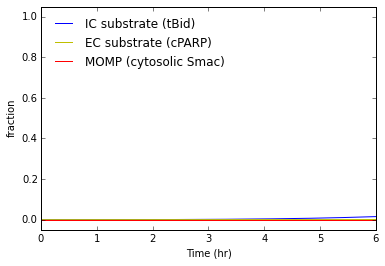

In [10]:
    t = linspace(0, 6*3600, 6*60+1)  # 6 hours
    x = odesolve(model, t)

    x_norm = c_[x['Bid_unbound'], x['PARP_unbound'], x['mSmac_unbound']]
    x_norm = 1 - x_norm / x_norm[0, :]  # gets away without max() since first values are largest

    # this is what I originally thought 4B was plotting. it's actually very close. -JLM
    #x_norm = array([x['tBid_total'], x['CPARP_total'], x['cSmac_total']]).T
    #x_norm /= x_norm.max(0)

    tp = t / 3600  # x axis as hours

    figure("Figure 4B")
    plot(tp, x_norm[:,0], 'b', label='IC substrate (tBid)')
    plot(tp, x_norm[:,1], 'y', label='EC substrate (cPARP)')
    plot(tp, x_norm[:,2], 'r', label='MOMP (cytosolic Smac)')
    legend(loc='upper left', bbox_to_anchor=(0,1)).draw_frame(False)
    xlabel('Time (hr)')
    ylabel('fraction')
    a = gca()
    a.set_ylim((-.05, 1.05))